# Mental Health in Tech Survey
1. The dataset
2. Naive Bayesian Classifier
3. Preprocessing and exploratory analysis with scikit-learn
4. Geographical Information of Participants

## The Dataset
https://www.kaggle.com/osmi/mental-health-in-tech-survey

In [123]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [124]:
data = pd.read_csv("/Users/victoriacabales/Documents/data_science/mental_health/survey.csv")

In [125]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [126]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


# Gender Ratio and Mental Health Consequences
Found using a Naive Bayesian Classifier.

In [128]:
male = set(["Mail", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "Male ", "man","msle", "mail", "malr","cis man", "cis male", "Male", "M", "Cis Man", "ostensibly male, unsure what that really means", "malr", "Male (CIS)", "Make", "Cis Male", "Man", "Male-ish", "Mal", "Malr"])
gender_queer = set(["Trans-female", "queer", "trans-female", "Agender", "something kinda male?", "queer/she/they", "non-binary","Trans woman", "all", "enby", "fluid", "genderqueer", "Genderqueer", "androgyne", "agender", "male leaning androgynous", "Guy (-ish) ^_^", "trans woman", "neuter", "Neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means", "All", "Androgyne", "Enby"])
female = set(["cis female", "Cis Female", "f", "female", "Female", "Female ", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail", "F", "Femake", "Woman", "Female (trans)", "Female (cis)"])
unspecified = set(["Nah", "nah", "p", "A little about you", "P"])

In [129]:
# Clean up data by standardizing all entries
for entry in male:
    data.loc[data.Gender == entry, 'Gender'] = 'male'

for entry in female:
    data.loc[data.Gender == entry, 'Gender'] = 'female'

for entry in gender_queer:
    data.loc[data.Gender == entry, 'Gender'] = 'queer'
    
for entry in unspecified:
    data.loc[data.Gender == entry, 'Gender'] = 'unspecified'

In [130]:
data['Gender'].value_counts() 

male           992
female         249
queer           15
unspecified      3
Name: Gender, dtype: int64

In [131]:
data.groupby(['Gender', 'mental_health_consequence']).size() 

Gender       mental_health_consequence
female       Maybe                        108
             No                            73
             Yes                           68
male         Maybe                        364
             No                           413
             Yes                          215
queer        Maybe                          5
             No                             4
             Yes                            6
unspecified  Yes                            3
dtype: int64

Text(0.5,1,'Gender and Mental Health Response Consequence Count')

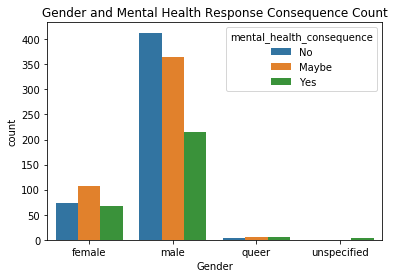

In [132]:
sns.countplot(x="Gender", data=data, hue="mental_health_consequence") # let's visualize that huge male skew
plt.title("Gender and Mental Health Response Consequence Count")

In [133]:
# By gender, let's find the likelihood of reporting a mental health consequence. 
# We'll use Bayes' Theorem P(A|B) = (P(B|A)*P(A))/P(B)
total = data.Gender.count()
p_f = len(data[data.Gender == 'female']) / total
p_m = len(data[data.Gender == 'male']) / total
p_q = len(data[data.Gender == 'queer']) / total
p_u = len(data[data.Gender == 'unspecified']) / total

# Probability that the person responded yes, no, or maybe
total2 = data.mental_health_consequence.count()
p_yes = len(data[data.mental_health_consequence == 'Yes']) / total2
p_no = len(data[data.mental_health_consequence == 'No']) / total2
p_maybe = len(data[data.mental_health_consequence == 'Maybe']) / total2

In [134]:
genders = ['female', 'male', 'queer', 'unspecified']
df2 = data[data.mental_health_consequence == 'Yes']
df3 = data[data.mental_health_consequence == 'No']
df4 = data[data.mental_health_consequence == 'Maybe']

# P(yes|gender)
yes_dict = {}
for g in genders:
    p = (len(df2[data.Gender == g]) / len(df2)) * p_yes / (len(data[data.Gender == g]) / total)
    yes_dict[g] = p

# P(no|gender)
no_dict = {}
for g in genders:
    p = (len(df3[data.Gender == g]) / len(df3)) * p_no / (len(data[data.Gender == g]) / total)
    no_dict[g] = p
    
# P(maybe|gender)
maybe_dict = {}
for g in genders:
    p = (len(df4[data.Gender == g]) / len(df4)) * p_maybe / (len(data[data.Gender == g]) / total)
    maybe_dict[g] = p

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [135]:
print('Probability of saying yes by gender:\n',yes_dict)
print('Probability of saying no by gender:\n',no_dict)
print('Probability of saying maybe by gender:\n',maybe_dict)

# 0, 1, and 2 represent yes, no, and maybe
p = pd.DataFrame([yes_dict,no_dict,maybe_dict])
p['response'] = ['yes','no','maybe']
p

Probability of saying yes by gender:
 {'female': 0.27309236947791166, 'male': 0.21673387096774194, 'queer': 0.4, 'unspecified': 1.0}
Probability of saying no by gender:
 {'female': 0.2931726907630522, 'male': 0.41633064516129037, 'queer': 0.26666666666666666, 'unspecified': 0.0}
Probability of saying maybe by gender:
 {'female': 0.43373493975903615, 'male': 0.36693548387096775, 'queer': 0.3333333333333333, 'unspecified': 0.0}


,female,male,queer,unspecified,response
0,0.273092,0.216734,0.400000,1.0,yes
1,0.293173,0.416331,0.266667,0.0,no
2,0.433735,0.366935,0.333333,0.0,maybe


Text(0.5,1,'Gender and Mental Health Consequence Response Probability')

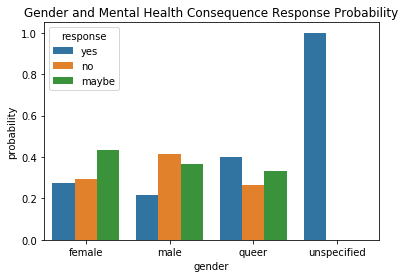

In [136]:
f = [yes_dict['female'], no_dict['female'], maybe_dict['female']]
m = [yes_dict['male'], no_dict['male'], maybe_dict['male']]
q = [yes_dict['queer'], no_dict['queer'], maybe_dict['queer']]
u = [yes_dict['unspecified'], no_dict['unspecified'], maybe_dict['unspecified']]
for_df = {'probability': f + m + q + u}
df = pd.DataFrame(for_df) 
lst = []
for entry in genders:
    for i in range(0,3):
        lst.append(entry)
df['gender'] = lst
response = ['yes','no','maybe', 'yes','no','maybe', 'yes','no','maybe', 'yes','no','maybe']
df['response'] = response
sns.barplot(x="gender",y="probability", data=df, hue="response") 
plt.title('Gender and Mental Health Consequence Response Probability')

# Preprocessing and Feature Importance with scikit-learn

In [140]:
# Encode data and make it easier to work with for machine learning
sample = data[data.leave != "Don't know"]
sample = sample.drop(['comments'],axis=1)
sample = sample.drop(['Timestamp'],axis=1)
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 1256
Data columns (total 25 columns):
Age                          696 non-null int64
Gender                       696 non-null object
Country                      696 non-null object
state                        363 non-null object
self_employed                687 non-null object
family_history               696 non-null object
treatment                    696 non-null object
work_interfere               573 non-null object
no_employees                 696 non-null object
remote_work                  696 non-null object
tech_company                 696 non-null object
benefits                     696 non-null object
care_options                 696 non-null object
wellness_program             696 non-null object
seek_help                    696 non-null object
anonymity                    696 non-null object
leave                        696 non-null object
mental_health_consequence    696 non-null object
phys_health_c

In [141]:
sample.isnull().sum().max() # check for missing data
# Clean the NaN's
default_string = 'NaN'
default_float = 0.0

# Create lists by type to help filter out the data (1 float type, 24 string objects)
float_features = ['Age']
string_features = list(filter(lambda x: x!= 'Age', list(sample.columns.values)))

for col in sample:
    if col in float_features:
        sample[col] = sample[col].fillna(default_float)
    elif col in string_features:
        sample[col] = sample[col].fillna(default_string)
    else:
        print('Error: feature %s not recognized' %feature)

sample.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
2,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
6,35,female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
8,42,female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No


In [142]:
# Encode the data
from sklearn import preprocessing

label_dict = {} # Store separately just to make labeling easier
for feature in sample:
    le = preprocessing.LabelEncoder()
    le.fit(sample[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    sample[feature] = le.transform(sample[feature])
    labelKey = feature
    labelValue = [*le_name_mapping]
    label_dict[labelKey] = labelValue
    
sample.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,24,0,40,9,0,0,1,2,4,0,...,2,1,1,1,1,2,1,0,2,0
2,19,1,6,24,0,0,0,3,4,0,...,0,0,1,1,2,2,2,2,1,0
3,18,1,39,24,0,1,1,2,2,0,...,1,0,2,2,1,0,0,0,1,1
6,22,0,40,16,0,1,1,4,0,1,...,1,0,0,0,1,0,1,1,0,0
8,29,0,40,9,0,1,1,4,1,0,...,1,2,0,1,2,2,1,0,1,0


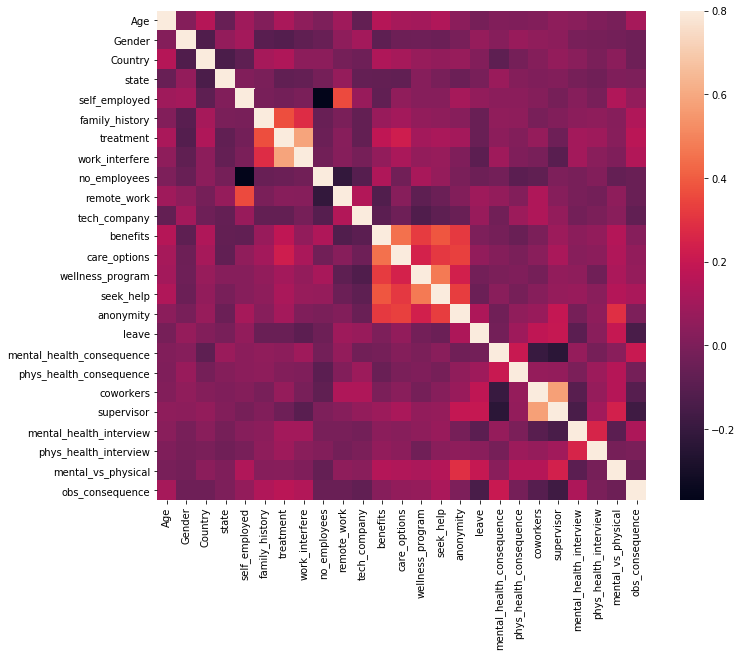

In [143]:
# Create a covariance matrix - measure of how one variable changes in respect to another
corr_map = sample.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_map, vmax=.8, square=True);
plt.show()

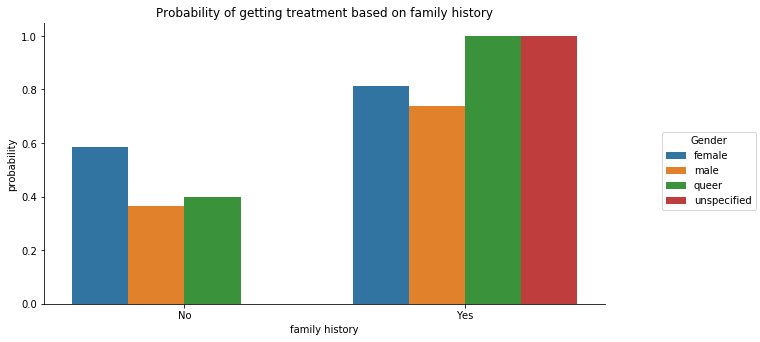

In [144]:
# Find treatment by gender
o = label_dict['family_history']
g = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=sample, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of getting treatment based on family history')
plt.ylabel('probability')
plt.xlabel('family history')

# replace legend labels
new_labels = label_dict['Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

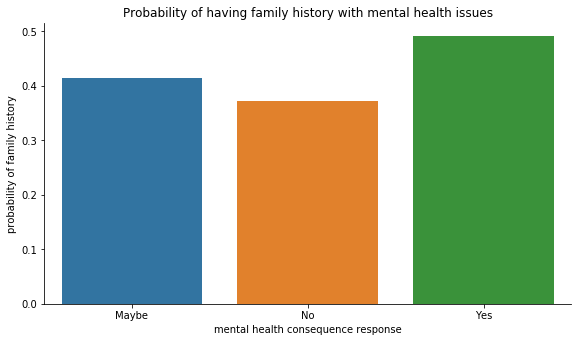

In [145]:
# Find mental health consequences by family history

o = label_dict['mental_health_consequence']
g = sns.factorplot(x="mental_health_consequence", y="family_history", data=sample, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of having family history with mental health issues')
plt.ylabel('probability of family history')
plt.xlabel('mental health consequence response')

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# Scale age because it's significantly larger than everything else
scaler = MinMaxScaler()
sample['Age'] = scaler.fit_transform(sample[['Age']])

# Split into training and testing sets
feature_cols = list(sample.columns.values)
X = sample[feature_cols]
y = sample.mental_health_consequence
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

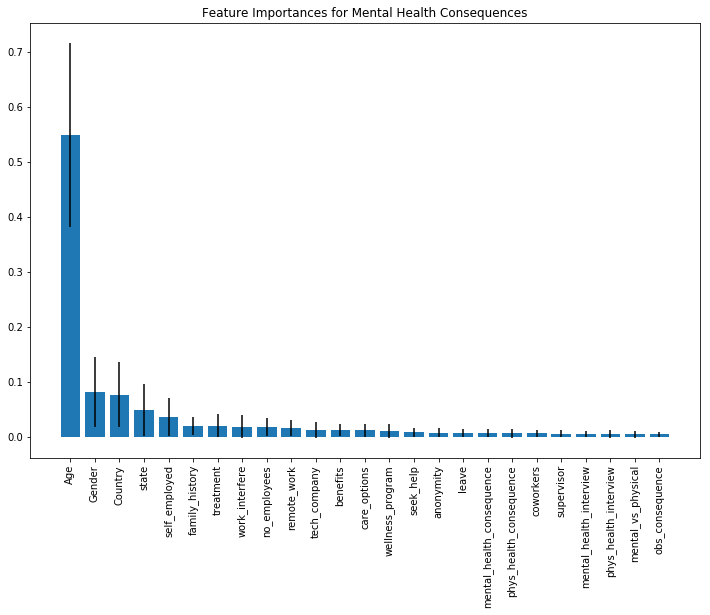

In [147]:
from sklearn.ensemble import RandomForestClassifier
# Calculate feature importance using a random forest
# Show RandomForestClassifier vs ExtraTreesClassifier
forest = RandomForestClassifier(n_estimators=250)
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])
    
plt.figure(figsize=(12,8))
plt.title("Feature Importances for Mental Health Consequences")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.show()

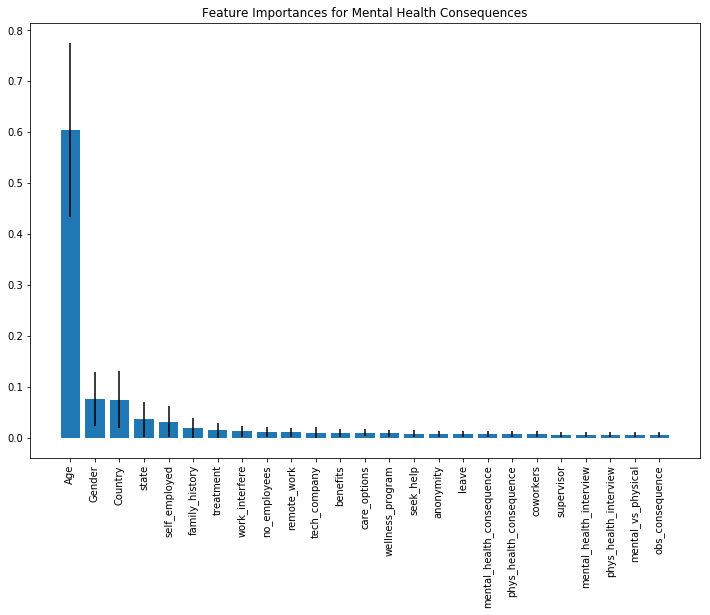

In [148]:
from sklearn.ensemble import ExtraTreesClassifier
# Calculating feature importances with ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250)
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])
    
plt.figure(figsize=(12,8))
plt.title("Feature Importances for Mental Health Consequences")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.show()

# Geographical Information

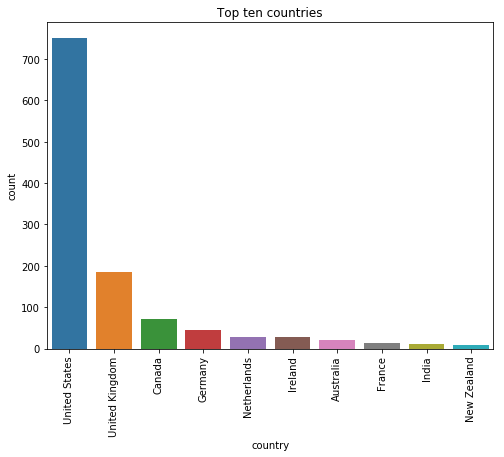

In [149]:
count = Counter(data['Country'].dropna().tolist()).most_common(10)
name = [country[0] for country in count]
val = [country[1] for country in count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = name,y=val ,ax =ax)
plt.title('Top ten countries')
plt.xlabel('country')
plt.ylabel('count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90) #for spacing

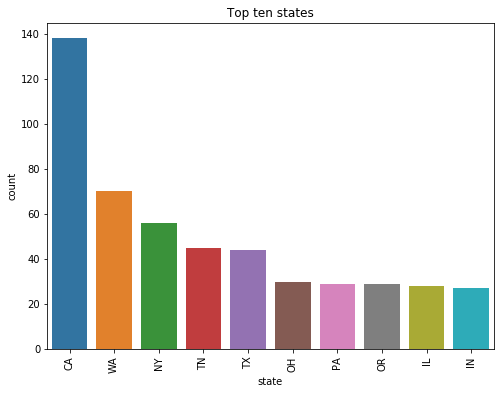

In [150]:
country_df = data[data.Country == 'United States']
country_df.state.unique()
count = Counter(country_df['state'].dropna().tolist()).most_common(10)
name = [state[0] for state in count]
val = [state[1] for state in count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = name,y=val ,ax =ax)
plt.title('Top ten states')
plt.xlabel('state')
plt.ylabel('count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90) #for spacing

In [151]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [152]:
state_dict = {}
for state in country_df.state.dropna():
    full_name = states[state]
    if full_name not in state_dict:
        state_dict[full_name] = float(1)
    else:
        state_dict[full_name] += 1

print (state_dict)

{'Illinois': 28.0, 'Indiana': 27.0, 'Texas': 44.0, 'Tennessee': 45.0, 'Michigan': 22.0, 'Ohio': 30.0, 'California': 138.0, 'Connecticut': 4.0, 'Maryland': 7.0, 'New York': 56.0, 'North Carolina': 14.0, 'Massachusetts': 20.0, 'Iowa': 4.0, 'Pennsylvania': 29.0, 'Washington': 70.0, 'Wisconsin': 12.0, 'Utah': 10.0, 'New Mexico': 2.0, 'Oregon': 29.0, 'Florida': 15.0, 'Minnesota': 21.0, 'Missouri': 12.0, 'Arizona': 7.0, 'Colorado': 9.0, 'Georgia': 12.0, 'District of Columbia': 4.0, 'Nebraska': 2.0, 'West Virginia': 1.0, 'Oklahoma': 6.0, 'Kansas': 3.0, 'Virginia': 14.0, 'New Hampshire': 3.0, 'Kentucky': 5.0, 'Alabama': 8.0, 'Nevada': 3.0, 'New Jersey': 6.0, 'South Carolina': 5.0, 'Vermont': 3.0, 'South Dakota': 3.0, 'Idaho': 1.0, 'Mississippi': 1.0, 'Rhode Island': 1.0, 'Wyoming': 2.0, 'Louisiana': 1.0, 'Maine': 1.0}


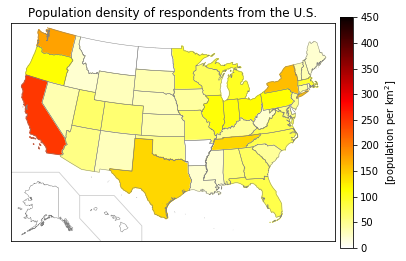

In [153]:
# Download Basemap https://github.com/matplotlib/basemap
# Download Pyproj https://github.com/jswhit/pyproj
# Download pyshp https://github.com/GeospatialPython/pyshp
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
            projection='merc',lat_ts=20)  # do not change these numbers

shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

#%% -------- choose a color for each state based on population density. -------
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = 0; vmax = 450 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in state_dict:
        state_dict[statename] = 0
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = state_dict[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('Population density of respondents from the U.S.')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[population per $\mathregular{km^2}$]')

plt.show()
